# Mini Batch Gradient Descent (from scratch)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

We know that the prediction, $\hat{y}$ is defined as:

$$
\hat{y_i} = w_1x_i + w_2
$$

Also by definition we know that the Mean Square Error (MSE) is:

$$
Error = \frac{1}{2m}\sum_{i=1}^{m}(y_i-\hat{y_i})^2
$$

Then we find the derivative (slope) of the MSE depending on $w_i$:

$$
\frac{\partial Error}{\partial w_j} = \frac{\partial Error}{\partial \hat{y_i}}\frac{\partial \hat{y_i}}{\partial w_j}
$$

And therefore:

$$
\frac{\partial Error}{\partial w_1} = -\frac{1}{m}\sum_{i=1}^{m}(y_i-\hat{y_i})x_i
$$
$$
\frac{\partial Error}{\partial w_2} = -\frac{1}{m}\sum_{i=1}^{m}(y_i-\hat{y_i})
$$

In order to adjust the weights $w_j$ so the Error is minimized we should update them as follow:

$$
w_j \rightarrow w_j - \alpha \frac{\partial Error}{\partial w_j}
$$

The two weights *W_new* and *b_new* are updated in the following Python function:

In [14]:
def MSEStep(X, y, W, b, learn_rate=0.1):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.

    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """

    # compute errors
    y_pred = np.matmul(X, W) + b
    difference = y - y_pred

    # compute steps
    W_new = W + learn_rate * np.matmul(difference, X) / X.size
    b_new = b + learn_rate * difference.sum() / X.size

    return W_new, b_new

The gradient descent step will be performed multiple times on the provided dataset, and the returned list of regression coefficients will be plotted.

In [15]:
def miniBatchGD(X, y, batch_size=20, learn_rate=0.1, num_iter=25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1])  # coefficients
    b = 0  # intercept

    # run iterations
    regression_coef = [np.hstack((W, b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch, :]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W, b)))

    return regression_coef

In [16]:
# Import data from CSV file
data = np.loadtxt('data.csv', delimiter = ',')
X = data[:,:-1]
y = data[:,-1]

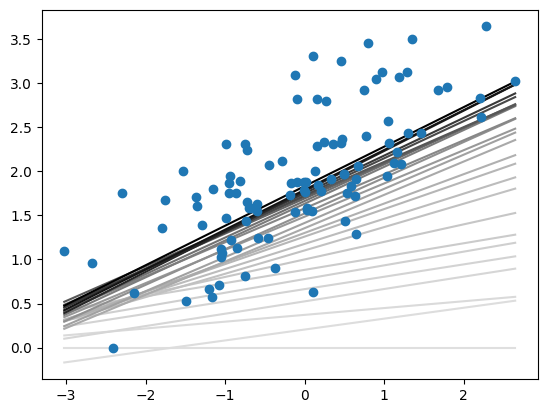

In [17]:
regression_coef = miniBatchGD(X, y)
# Plot the regression coefficient
plt.figure()
X_min = X.min()
X_max = X.max()
counter = len(regression_coef)
for W, b in regression_coef:
    counter -= 1
    color = [1 - 0.92 ** counter for _ in range(3)]
    plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
plt.scatter(X, y, zorder = 3)
plt.show()

Now we are going to check that our mini batch model can predict a sample value and we compare it to the standard LinearRegression model from sklearn:

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [20]:
sample = [-0.44442]
model.predict([sample])

array([1.76138572])

In [21]:
np.dot(sample + [1], regression_coef[-1])


np.float64(1.6297807663015218)